[View in Colaboratory](https://colab.research.google.com/github/webserg/pythonML/blob/master/colab/fashionMNIST_normal.ipynb)

In [1]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle


In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [3]:
!pwd

/content


In [5]:
!kaggle datasets download -d zalando-research/fashionmnist -p ./fashionmnist

fashionmnist.zip: Downloaded 69MB of 69MB to ./fashionmnist


In [6]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
data_train = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [8]:
size_of_image = (img_rows, img_cols)
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data_train.iloc[:,1:].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = np.array(data_train.iloc[:, 1:])
X[0].shape

(784,)

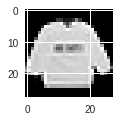

In [11]:
from matplotlib import pyplot
pyplot.subplot(330 + 1+ 1)
pyplot.imshow(X[0].reshape(28,28),  cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [12]:
y = to_categorical(np.array(data_train.iloc[:, 0]))
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [0]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [15]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
# convert from int to float
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

(48000, 28, 28, 1)


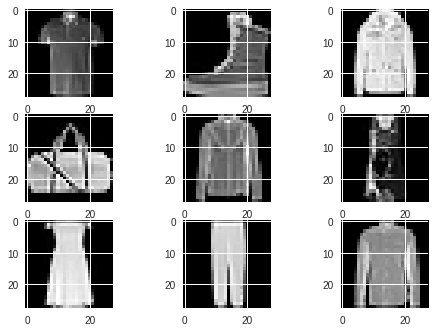

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
train_datagen.fit(X_train)

validation_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
validation_datagen.fit(X_val)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [0]:
train_generator = train_datagen.flow(
X_train,
y_train,
batch_size=32)
validation_generator = validation_datagen.flow(
X_val,
y_val,
batch_size=32)

32
<class 'tuple'>
<class 'numpy.ndarray'>
(28, 28, 1)


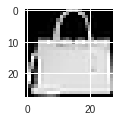

In [18]:
from matplotlib import pyplot
print(validation_generator.batch_size)
print(type(validation_generator.next()))
(q,w)=validation_generator.next()
print(type(q[0]))
print(q[2].shape)
pyplot.subplot(330 + 1 + 1)
pyplot.imshow(q[4].reshape(size_of_image),  cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [47]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [0]:
from keras import optimizers
from keras import losses
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [49]:
history = model.fit_generator(train_generator,
          epochs=50,
          verbose=1,
          validation_data=validation_generator)
model.save('./fashion_1.h5')

Epoch 1/50
1500/1500 [==============================] - 22s 15ms/step - loss: 1.1049 - acc: 0.5944 - val_loss: 0.6757 - val_acc: 0.7589
Epoch 2/50
1153/1500 [======================>.......] - ETA: 4s - loss: 0.7327 - acc: 0.7334

1500/1500 [==============================] - 22s 15ms/step - loss: 0.7245 - acc: 0.7368 - val_loss: 0.5792 - val_acc: 0.7871
Epoch 3/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.6458 - acc: 0.7665 - val_loss: 0.5325 - val_acc: 0.8023
Epoch 4/50
 121/1500 [=>............................] - ETA: 18s - loss: 0.6258 - acc: 0.7714

1500/1500 [==============================] - 22s 15ms/step - loss: 0.6045 - acc: 0.7810 - val_loss: 0.4961 - val_acc: 0.8183
Epoch 5/50
1322/1500 [=========================>....] - ETA: 2s - loss: 0.5719 - acc: 0.7940

1500/1500 [==============================] - 22s 15ms/step - loss: 0.5687 - acc: 0.7956 - val_loss: 0.4652 - val_acc: 0.8271
Epoch 6/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5419 - acc: 0.8045 - val_loss: 0.4463 - val_acc: 0.8330
Epoch 7/50
 170/1500 [==>...........................] - ETA: 17s - loss: 0.5425 - acc: 0.8050

1500/1500 [==============================] - 22s 14ms/step - loss: 0.5214 - acc: 0.8118 - val_loss: 0.4338 - val_acc: 0.8389
Epoch 8/50
1346/1500 [=========================>....] - ETA: 2s - loss: 0.5077 - acc: 0.8173

1500/1500 [==============================] - 22s 14ms/step - loss: 0.5049 - acc: 0.8181 - val_loss: 0.4175 - val_acc: 0.8448
Epoch 9/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4886 - acc: 0.8254 - val_loss: 0.4071 - val_acc: 0.8520
Epoch 10/50
 173/1500 [==>...........................] - ETA: 17s - loss: 0.4885 - acc: 0.8241

1500/1500 [==============================] - 22s 14ms/step - loss: 0.4709 - acc: 0.8300 - val_loss: 0.3998 - val_acc: 0.8495
Epoch 11/50
1347/1500 [=========================>....] - ETA: 2s - loss: 0.4626 - acc: 0.8318

1500/1500 [==============================] - 22s 15ms/step - loss: 0.4607 - acc: 0.8326 - val_loss: 0.3857 - val_acc: 0.8566
Epoch 12/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4504 - acc: 0.8365 - val_loss: 0.3826 - val_acc: 0.8569
Epoch 13/50
 181/1500 [==>...........................] - ETA: 17s - loss: 0.4218 - acc: 0.8462

1500/1500 [==============================] - 22s 14ms/step - loss: 0.4409 - acc: 0.8391 - val_loss: 0.3753 - val_acc: 0.8607
Epoch 14/50
1345/1500 [=========================>....] - ETA: 2s - loss: 0.4327 - acc: 0.8445

1500/1500 [==============================] - 22s 14ms/step - loss: 0.4321 - acc: 0.8457 - val_loss: 0.3704 - val_acc: 0.8593
Epoch 15/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4229 - acc: 0.8454 - val_loss: 0.3560 - val_acc: 0.8661
Epoch 16/50
 172/1500 [==>...........................] - ETA: 17s - loss: 0.4091 - acc: 0.8517

1500/1500 [==============================] - 22s 14ms/step - loss: 0.4157 - acc: 0.8498 - val_loss: 0.3569 - val_acc: 0.8658
Epoch 17/50
1354/1500 [==========================>...] - ETA: 1s - loss: 0.4108 - acc: 0.8522

1500/1500 [==============================] - 22s 14ms/step - loss: 0.4079 - acc: 0.8527 - val_loss: 0.3549 - val_acc: 0.8650
Epoch 18/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4034 - acc: 0.8543 - val_loss: 0.3418 - val_acc: 0.8729
Epoch 19/50
 181/1500 [==>...........................] - ETA: 17s - loss: 0.3777 - acc: 0.8610

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3982 - acc: 0.8560 - val_loss: 0.3413 - val_acc: 0.8748
Epoch 20/50
1351/1500 [==========================>...] - ETA: 1s - loss: 0.3915 - acc: 0.8574

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3922 - acc: 0.8575 - val_loss: 0.3386 - val_acc: 0.8738
Epoch 21/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3876 - acc: 0.8599 - val_loss: 0.3309 - val_acc: 0.8790
Epoch 22/50
 169/1500 [==>...........................] - ETA: 17s - loss: 0.3759 - acc: 0.8628

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3799 - acc: 0.8613 - val_loss: 0.3300 - val_acc: 0.8768
Epoch 23/50
1364/1500 [==========================>...] - ETA: 1s - loss: 0.3787 - acc: 0.8617

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3778 - acc: 0.8618 - val_loss: 0.3329 - val_acc: 0.8765
Epoch 24/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3723 - acc: 0.8659 - val_loss: 0.3256 - val_acc: 0.8781
Epoch 25/50
 176/1500 [==>...........................] - ETA: 17s - loss: 0.3630 - acc: 0.8679

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3680 - acc: 0.8673 - val_loss: 0.3181 - val_acc: 0.8823
Epoch 26/50
1354/1500 [==========================>...] - ETA: 1s - loss: 0.3632 - acc: 0.8677

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3656 - acc: 0.8675 - val_loss: 0.3153 - val_acc: 0.8816
Epoch 27/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3659 - acc: 0.8656 - val_loss: 0.3211 - val_acc: 0.8778
Epoch 28/50
 192/1500 [==>...........................] - ETA: 17s - loss: 0.3622 - acc: 0.8690

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3551 - acc: 0.8720 - val_loss: 0.3147 - val_acc: 0.8827
Epoch 29/50
1366/1500 [==========================>...] - ETA: 1s - loss: 0.3524 - acc: 0.8723

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3539 - acc: 0.8718 - val_loss: 0.3122 - val_acc: 0.8845
Epoch 30/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3494 - acc: 0.8725 - val_loss: 0.3044 - val_acc: 0.8871
Epoch 31/50
 176/1500 [==>...........................] - ETA: 17s - loss: 0.3390 - acc: 0.8791

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3484 - acc: 0.8736 - val_loss: 0.3092 - val_acc: 0.8836
Epoch 32/50
1350/1500 [==========================>...] - ETA: 2s - loss: 0.3407 - acc: 0.8758

1500/1500 [==============================] - 22s 15ms/step - loss: 0.3418 - acc: 0.8752 - val_loss: 0.3230 - val_acc: 0.8781
Epoch 33/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3392 - acc: 0.8741 - val_loss: 0.3022 - val_acc: 0.8869
Epoch 34/50
 169/1500 [==>...........................] - ETA: 17s - loss: 0.3374 - acc: 0.8826

1500/1500 [==============================] - 22s 15ms/step - loss: 0.3413 - acc: 0.8771 - val_loss: 0.3026 - val_acc: 0.8882
Epoch 35/50
1344/1500 [=========================>....] - ETA: 2s - loss: 0.3383 - acc: 0.8775

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3372 - acc: 0.8775 - val_loss: 0.2992 - val_acc: 0.8890
Epoch 36/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3294 - acc: 0.8790 - val_loss: 0.2980 - val_acc: 0.8882
Epoch 37/50
 179/1500 [==>...........................] - ETA: 17s - loss: 0.3273 - acc: 0.8774

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3280 - acc: 0.8796 - val_loss: 0.3004 - val_acc: 0.8860
Epoch 38/50
1369/1500 [==========================>...] - ETA: 1s - loss: 0.3317 - acc: 0.8775

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3312 - acc: 0.8782 - val_loss: 0.2968 - val_acc: 0.8889
Epoch 39/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3247 - acc: 0.8815 - val_loss: 0.2901 - val_acc: 0.8913
Epoch 40/50
 180/1500 [==>...........................] - ETA: 17s - loss: 0.3265 - acc: 0.8762

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3233 - acc: 0.8811 - val_loss: 0.2906 - val_acc: 0.8931
Epoch 41/50
1367/1500 [==========================>...] - ETA: 1s - loss: 0.3216 - acc: 0.8826

1500/1500 [==============================] - 22s 14ms/step - loss: 0.3213 - acc: 0.8827 - val_loss: 0.2900 - val_acc: 0.8896
Epoch 42/50
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3211 - acc: 0.8835 - val_loss: 0.2917 - val_acc: 0.8903
Epoch 43/50
 182/1500 [==>...........................] - ETA: 17s - loss: 0.3199 - acc: 0.8870

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3176 - acc: 0.8839 - val_loss: 0.2891 - val_acc: 0.8926
Epoch 44/50
1376/1500 [==========================>...] - ETA: 1s - loss: 0.3148 - acc: 0.8846

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3140 - acc: 0.8850 - val_loss: 0.2874 - val_acc: 0.8935
Epoch 45/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3136 - acc: 0.8860 - val_loss: 0.2879 - val_acc: 0.8944
Epoch 46/50
 187/1500 [==>...........................] - ETA: 17s - loss: 0.3075 - acc: 0.8879

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3117 - acc: 0.8859 - val_loss: 0.2859 - val_acc: 0.8956
Epoch 47/50
1388/1500 [==========================>...] - ETA: 1s - loss: 0.3069 - acc: 0.8857

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3067 - acc: 0.8863 - val_loss: 0.2902 - val_acc: 0.8928
Epoch 48/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3090 - acc: 0.8855 - val_loss: 0.2809 - val_acc: 0.8954
Epoch 49/50
 202/1500 [===>..........................] - ETA: 16s - loss: 0.2994 - acc: 0.8878

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3053 - acc: 0.8885 - val_loss: 0.2789 - val_acc: 0.8952
Epoch 50/50
1406/1500 [===========================>..] - ETA: 1s - loss: 0.3032 - acc: 0.8892

1500/1500 [==============================] - 21s 14ms/step - loss: 0.3029 - acc: 0.8891 - val_loss: 0.2850 - val_acc: 0.8972


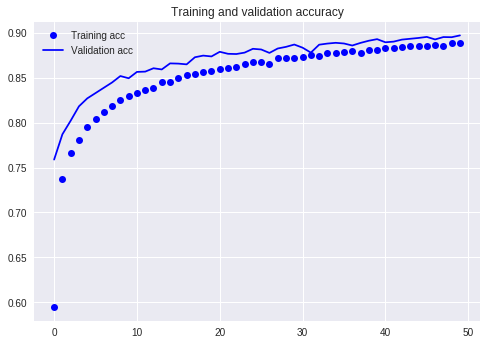

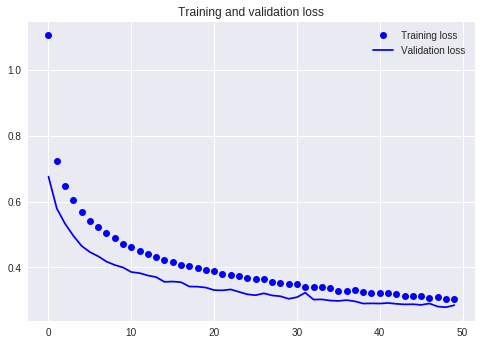

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen.fit(X_test)
test_generator = test_datagen.flow(
X_test,
y_test,
batch_size=32)

In [0]:
import numpy as np
res = model.evaluate_generator(test_generator)

In [53]:
print(res)
print('Test loss:', res[0])
print('Test accuracy:', res[1])

[0.26464100942611696, 0.9022]
Test loss: 0.26464100942611696
Test accuracy: 0.9022


In [0]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [56]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.93      0.63      0.75      1000
    Class 1       0.95      0.97      0.96      1000
    Class 2       0.78      0.19      0.30      1000
    Class 3       0.96      0.69      0.80      1000
    Class 4       0.33      0.99      0.50      1000
    Class 5       0.78      0.98      0.87      1000
    Class 6       0.61      0.22      0.32      1000
    Class 7       0.92      0.75      0.82      1000
    Class 8       0.96      0.95      0.96      1000
    Class 9       0.97      0.89      0.93      1000

avg / total       0.82      0.73      0.72     10000



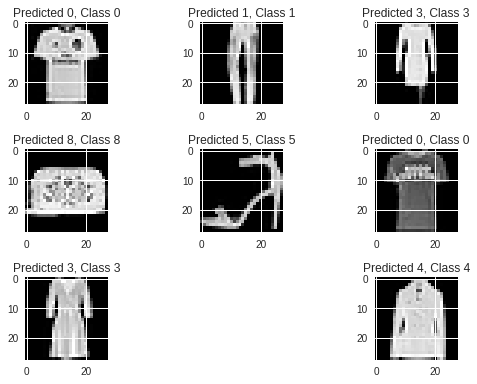

In [57]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

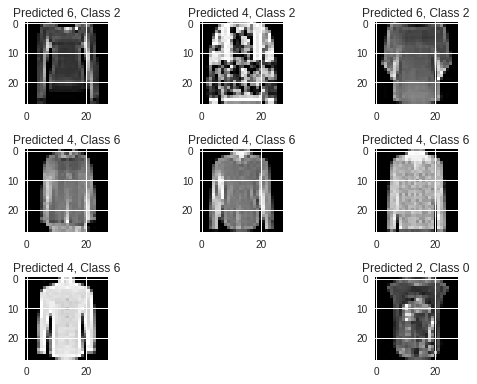

In [58]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

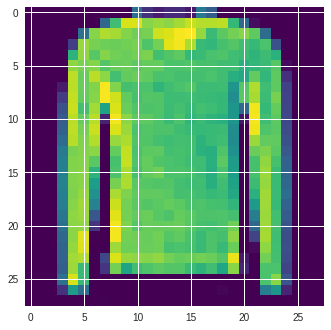

In [59]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


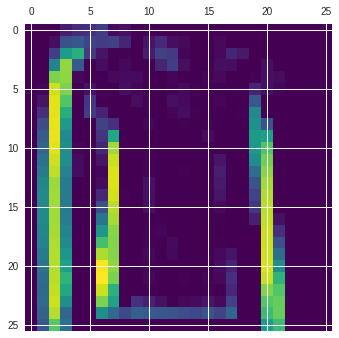

In [60]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


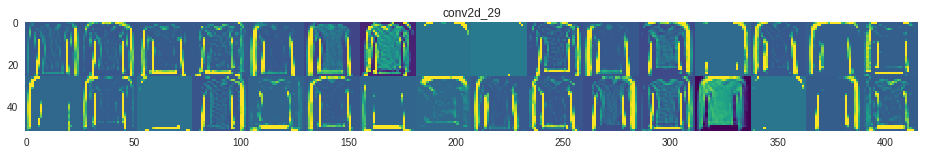

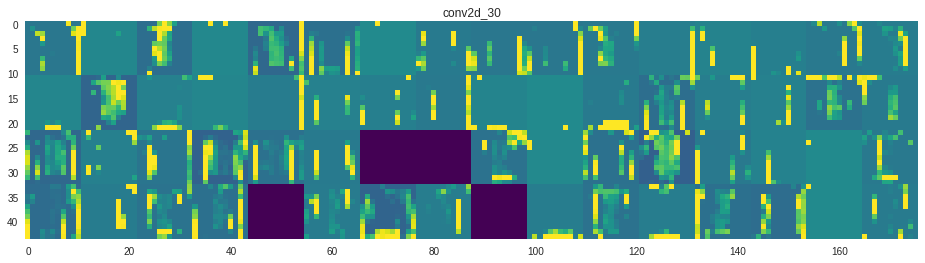

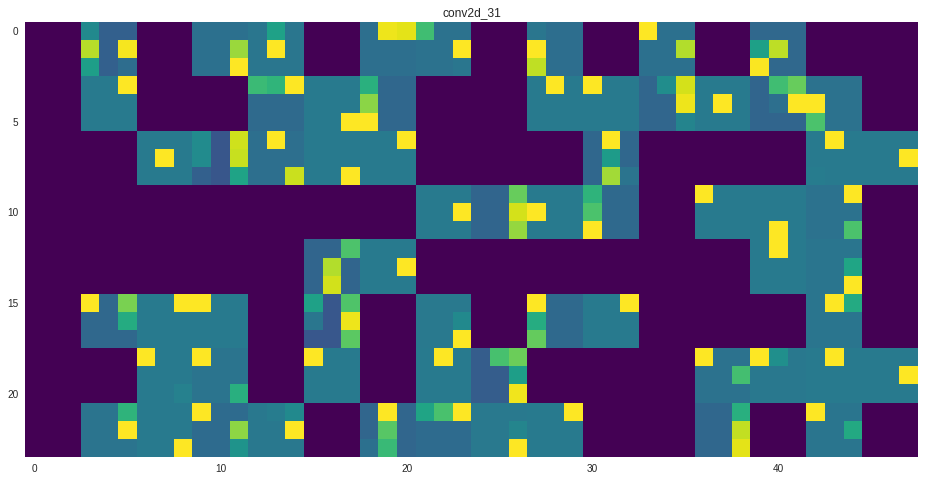

In [61]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
!kaggle competitions submit -c datasciencebowl -f /content/plankton/result.csv -m "Adam(lr=0.001) 20 epoch gray scale"

Successfully submitted to National Data Science Bowl

In [0]:
from google.colab import files
files.download('./fashion_1.h5')